In [1]:
from pathlib import Path
import numpy as np 
from PIL import Image

import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt


import utils

In [2]:
CLASSES = ['Healthy', 'OC Degeneration']
input_stages = {'0': 'training', '1': 'validation_nodiag', '2': 'validation_noxai'}
BASEPATH = Path('/Users/djohnson/sciebo/1. Research/1. HCXAI/1. Projects/evalxai_studies/example_validation_study')

In [9]:
gdrive = Path('/Users/djohnson/Library/CloudStorage/GoogleDrive-fortjay81@gmail.com/My Drive')
samples_path = gdrive / 'hcxai/blockies/oc_degeneration_original'

xai_samples_csv = samples_path / 'original_input' / 'pytorch_model' / '2024-11-21' / f'xai_samples' / 'xai_samples_df.csv'
df_xai_samples = pd.read_csv(xai_samples_csv )

In [5]:
# (or setup own data location if prefered)
data_dir = utils.download_file(url="https://uni-bielefeld.sciebo.de/s/AIJLvXMwP0ngEiW/download",
                               file_name="two4two_datasets.tar.gz",
                               cache_dir= '../data',
                               extract=False,
                               force_download=False,
                               archive_folder='two4two_datasets')
data_dir

File downloaded to: ../data/two4two_datasets.tar.gz
File extracted to: ../data


PosixPath('../data/two4two_datasets')

In [10]:
def get_image(id):
  f_path = data_dir / 'test' / df_xai_samples.loc[df_xai_samples.id == id, 'filename'].values[0]
  image = np.array(Image.open(f_path).convert('RGB')) * 1. / 255
  return image

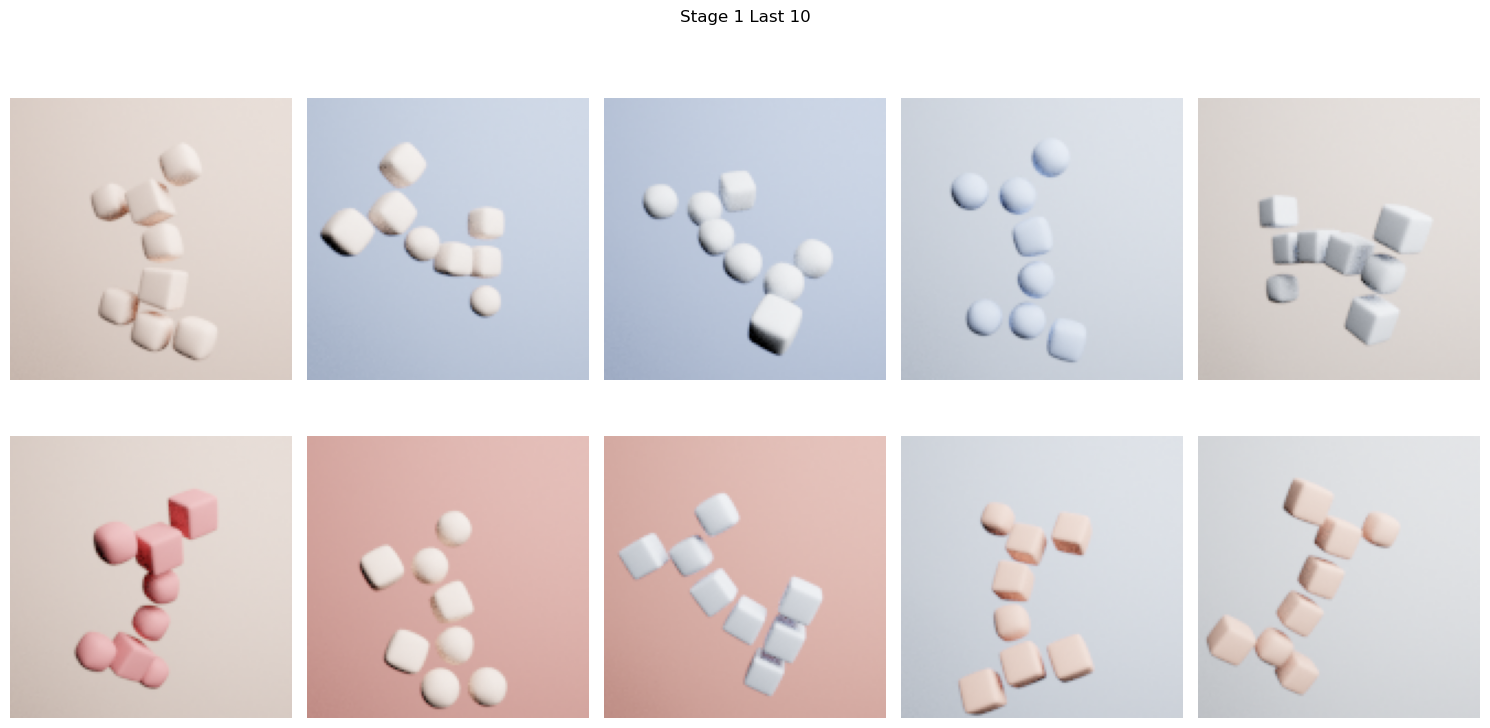

In [26]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for ax, (id, img) in zip(axes.flatten(), imgs_1.items()):
    ax.imshow(img)
    # ax.set_title(f'Model: {model} | Actual: {actual}')
    ax.axis('off')
plt.suptitle('Stage 1 Last 10')
plt.tight_layout()

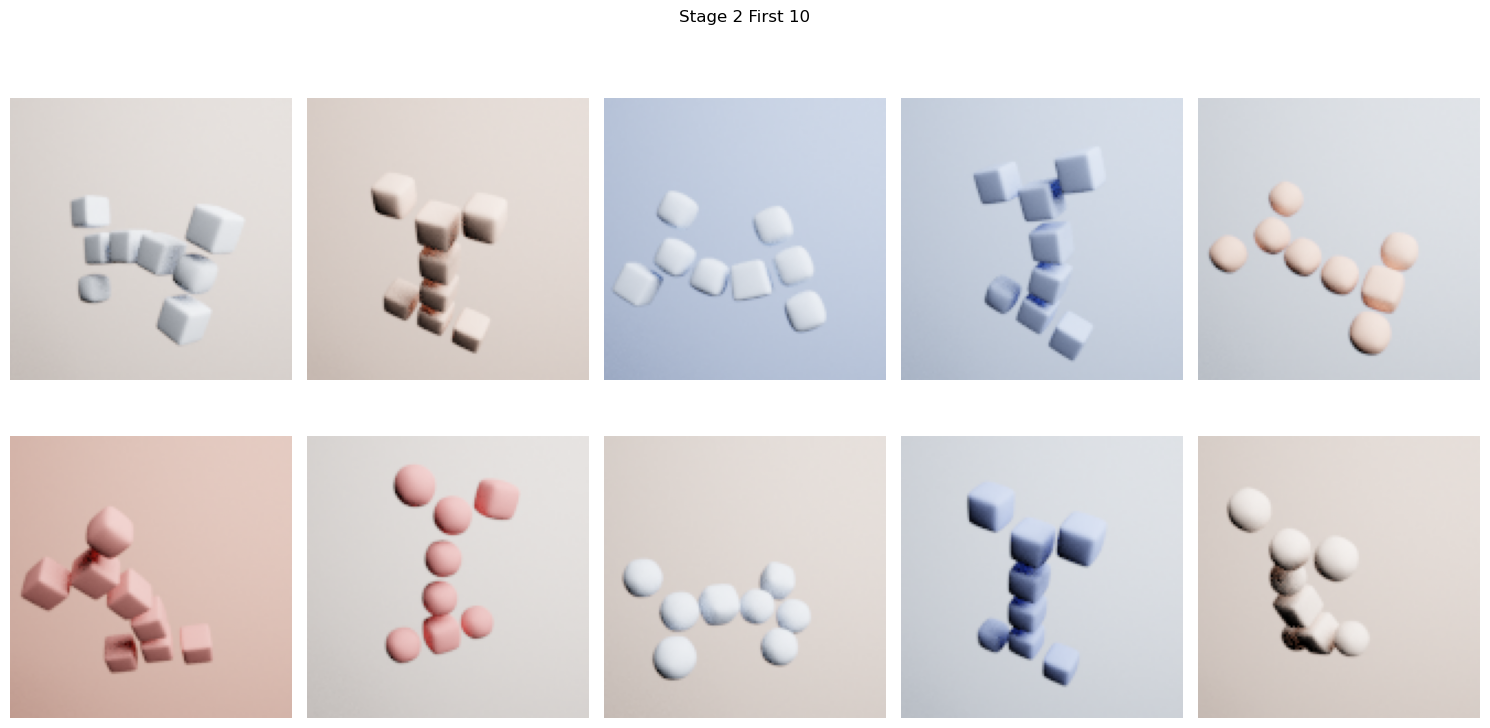

In [27]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for ax, (id, img) in zip(axes.flatten(), imgs_2.items()):
    ax.imshow(img)
    # ax.set_title(f'Model: {model} | Actual: {actual}')
    ax.axis('off')
plt.suptitle('Stage 2 First 10')
plt.tight_layout()

## Check for wrong predictions first 10

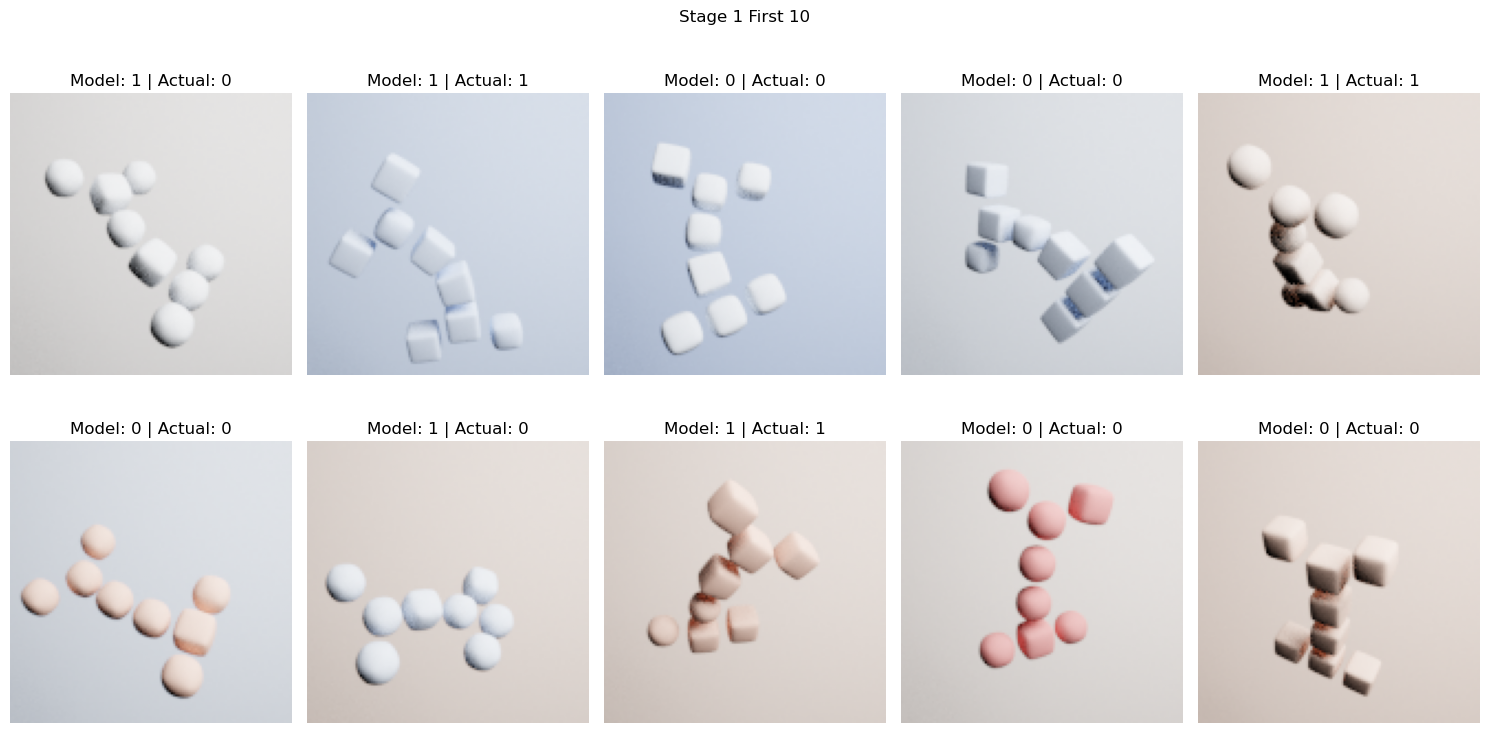

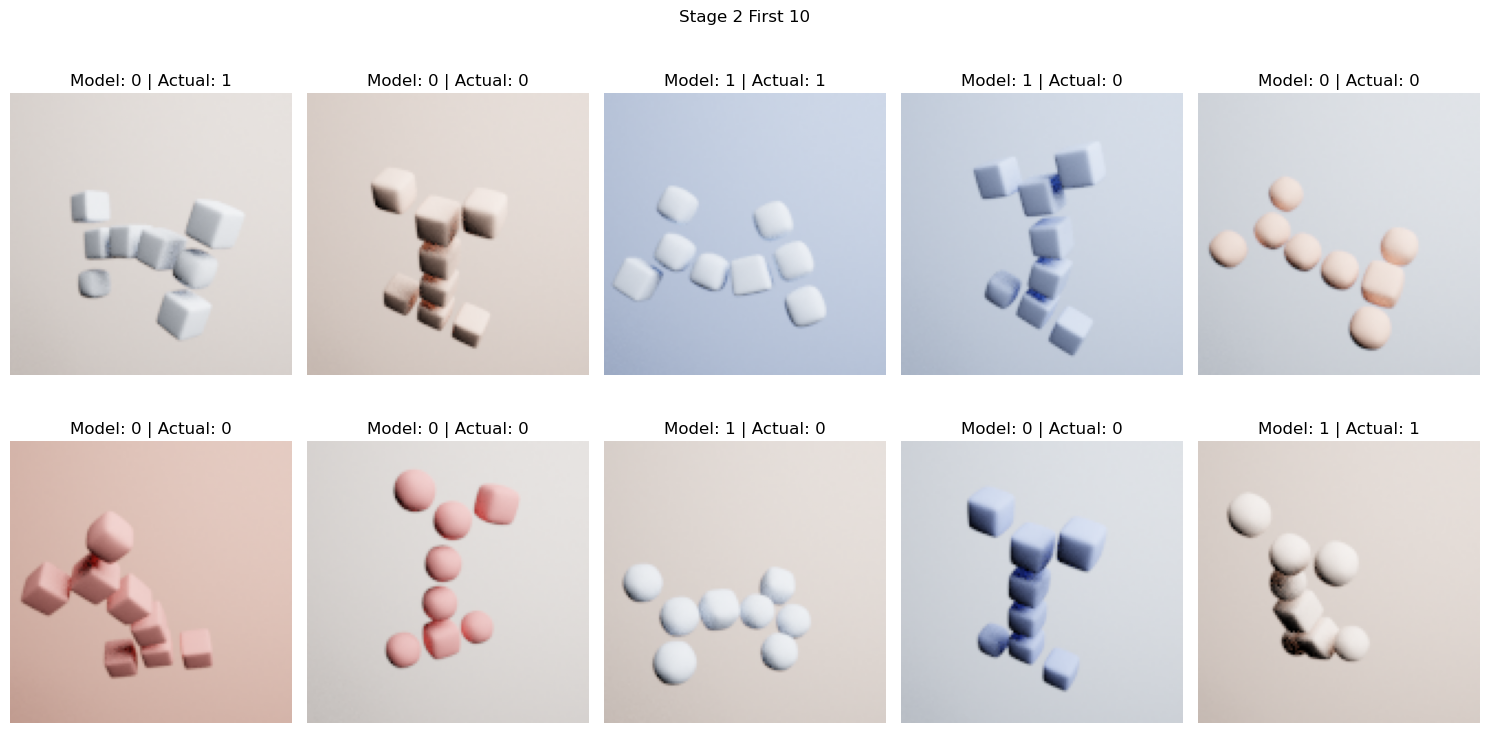

In [37]:
df_1 = df_sets[df_sets['stage_name'] == 1].head(10)
imgs_1 = {s.id: get_image(s.id) for _, s in df_1.iterrows()}

df_2 = df_sets[df_sets['stage_name'] == 2].head(10)
imgs_2 = {s.id: get_image(s.id) for _, s in df_2.iterrows()}

fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for ax, (id, img) in zip(axes.flatten(), imgs_1.items()):
    ax.imshow(img)
    model = df_xai_samples.loc[df_xai_samples['id'] == id, 'nobias_pred'].values[0]
    actual = df_xai_samples.loc[df_xai_samples['id'] == id, 'ill'].values[0]
    ax.set_title(f'Model: {model} | Actual: {actual}')
    ax.axis('off')
plt.suptitle('Stage 1 First 10')
plt.tight_layout()

fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for ax, (id, img) in zip(axes.flatten(), imgs_2.items()):
    ax.imshow(img)
    model = df_xai_samples.loc[df_xai_samples['id'] == id, 'nobias_pred'].values[0]
    actual = df_xai_samples.loc[df_xai_samples['id'] == id, 'ill'].values[0]
    ax.set_title(f'Model: {model} | Actual: {actual}')
    ax.axis('off')
plt.suptitle('Stage 2 First 10')
plt.tight_layout()